# Machine Learning I (CC2008) - 2022/2023

## Exercise Sheet 2

### Performance Estimation Methodologies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score, roc_auc_score

Read the Hotel Reservation data set into a data frame

In [3]:
df = pd.read_csv("HotelReservations.csv")

For the set of predictors, select the columns 'required_car_parking_space', 'lead_time', 'repeated_guest', 'avg_price_per_room' and those whose name starts with 'no_of_'. For the target variable, map column 'booking_status' values to 1 for 'Canceled' and 0 for 'Not Canceled'

In [4]:
cols = ['required_car_parking_space', 'lead_time', 'repeated_guest', 'avg_price_per_room'] + [col for col in df.columns if col.startswith('no_of_')]
#print(cols)

In [5]:
df.booking_status = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

Define a simple decision tree classifier with max_depth = 5. Check with split criterion is set by default

In [6]:
tree = DecisionTreeClassifier(max_depth=5)
tree.criterion

'gini'

Define a train/test split of the data set with a test size equal to 30%. Fit the decision tree classifier to the training data and evaluate its accuracy on the test data. Hint: use the functions 'fit()', 'predict()' and 'accuracy_score()'

In [7]:
X = df[cols]
y = df['booking_status']
#print(X)
#print(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [9]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [10]:
y_pred = tree.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, y_pred))

Accuracy =  0.8080492511256088


Define a function that displays the confusion matrix and the accuracy, given a fitted model, the predictors and the target of the test set. Hint: use the functions 'confusion_matrix()' and 'ConfusionMatrixDisplay()'

Accuracy =  0.8080492511256088


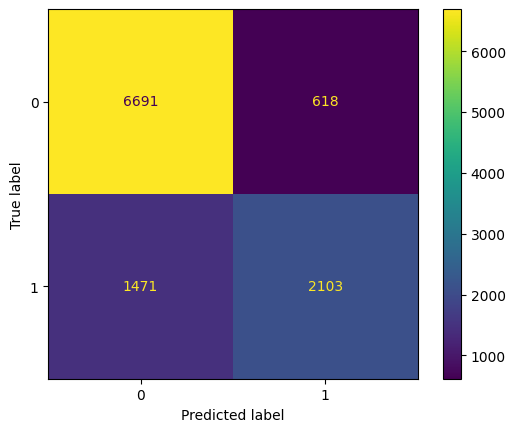

In [11]:
def plot_cm(model_fit, X_test, y_test):
    y_pred = model_fit.predict(X_test)
    print("Accuracy = ", accuracy_score(y_pred, y_test))
    cm = confusion_matrix(y_test, y_pred)
    disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_fit.classes_)
    disp_cm.plot()
    
plot_cm(tree, X_test, y_test)    

Define a function that plots the ROC curve and respective AUC, given a fitted model, the predictors and the target of the test set. Hint: use the functions 'predict_proba()', 'roc_curve()' and 'roc_auc_score()'

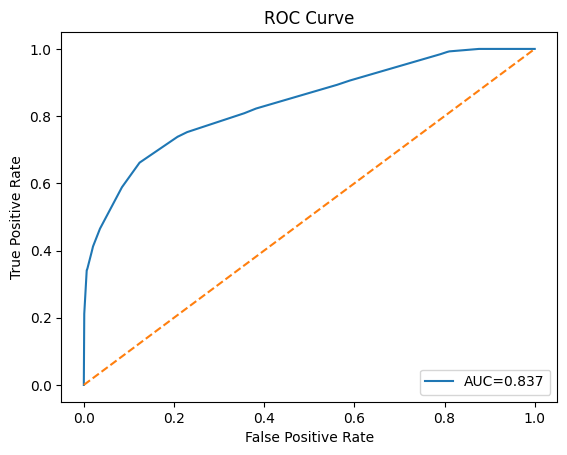

In [12]:
def plot_roc_curve(model_fit, X_test, y_test):
    y_pred_prob = model_fit.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:,1])
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    plt.plot(fpr, tpr, label="AUC=" + str(round(auc, 3)))
    plt.plot(np.linspace(0,1,5), np.linspace(0,1,5),linestyle='--')
    plt.title('ROC Curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    
plot_roc_curve(tree, X_test, y_test)

Define a function 'holdout_estimation()' that receives an unfitted model, the set of predictors, the target, and the size of the test partition and returns tha accuracy estimate

In [13]:
def holdout_estimation(model, X, y, test_size=0.3, seed=0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Estimated accuracy by holdout (", test_size, ") = ", round(accuracy_score(y_test, y_pred), 3))

holdout_estimation(tree, X, y)    

Estimated accuracy by holdout ( 0.3 ) =  0.808


Define a function 'cv_estimation()' that receives an unfitted model, the set of predictors, the target, and the number of k for the k-fold cv and returns the accuracy estimate (mean and standard deviation). Hint: If you don't wnat to obtain all the partitions for training/testing, you can use the function 'cross_val_score()'

In [14]:
def cv_estimation(model, X, y, k=8):
    accuracy_cv = cross_val_score(model, X, y, cv=k)
    print("Estimated accuracy by ", k, "- cv = ", round(accuracy_cv.mean(), 3), "+/-", round(accuracy_cv.std(), 3))
    
cv_estimation(tree, X, y)

Estimated accuracy by  8 - cv =  0.811 +/- 0.006


Train decision trees with different values with for the hyperparameters max_depth, min_samples_split, min_samples_leaf, and min_impurity_decrease. Analyse how that impacts the fitted model's performance by holdout and cross-validation

In [15]:
tree1 = DecisionTreeClassifier(max_depth=20)
holdout_estimation(tree1, X, y)
cv_estimation(tree1, X, y)

Estimated accuracy by holdout ( 0.3 ) =  0.844
Estimated accuracy by  8 - cv =  0.852 +/- 0.006


In [16]:
tree2 = DecisionTreeClassifier(max_depth=20, min_samples_split=5)
holdout_estimation(tree2, X, y)
cv_estimation(tree2, X, y)

Estimated accuracy by holdout ( 0.3 ) =  0.841
Estimated accuracy by  8 - cv =  0.852 +/- 0.006


In [17]:
tree3 = DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)
holdout_estimation(tree3, X, y)
cv_estimation(tree3, X, y)

Estimated accuracy by holdout ( 0.3 ) =  0.843
Estimated accuracy by  8 - cv =  0.849 +/- 0.005


In [18]:
tree4 = DecisionTreeClassifier(max_depth=20, min_impurity_decrease=0.01)
holdout_estimation(tree4, X, y)
cv_estimation(tree4, X, y)

Estimated accuracy by holdout ( 0.3 ) =  0.767
Estimated accuracy by  8 - cv =  0.77 +/- 0.007


For a decision tree with a max_depth of 20, consider that partitions of increasing size (e.g. from 10% to 100%, with steps of 10%) are given for training the model with the remaining partition for testing. Check how the performance on the train and the test sets evolves. Hint: use the function learning_curve() that determines cross-validated training and test scores for different training set sizes

In [21]:
def plot_learning_curves(model, X, y, title=''):
    tr_size = np.linspace(0.1, 1.0, 10)
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='accuracy', train_sizes=tr_size, cv=5)
    
    for tr_size, cv_tr_score, cv_ts_score in zip(train_sizes, train_scores, test_scores):
        print("Train size:", tr_size, "Train score:", round(cv_tr_score.mean(), 3), "Test score:", round(cv_ts_score.mean(), 3))
        
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(train_scores, axis=1)
    
    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Test score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.title('Learning Curves ' + title)
    plt.show()

Train size: 2902 Train score: 0.904 Test score: 0.805
Train size: 5804 Train score: 0.883 Test score: 0.817
Train size: 8706 Train score: 0.873 Test score: 0.824
Train size: 11608 Train score: 0.867 Test score: 0.83
Train size: 14510 Train score: 0.865 Test score: 0.836
Train size: 17412 Train score: 0.864 Test score: 0.835
Train size: 20314 Train score: 0.862 Test score: 0.84
Train size: 23216 Train score: 0.862 Test score: 0.841
Train size: 26118 Train score: 0.859 Test score: 0.84
Train size: 29020 Train score: 0.857 Test score: 0.841


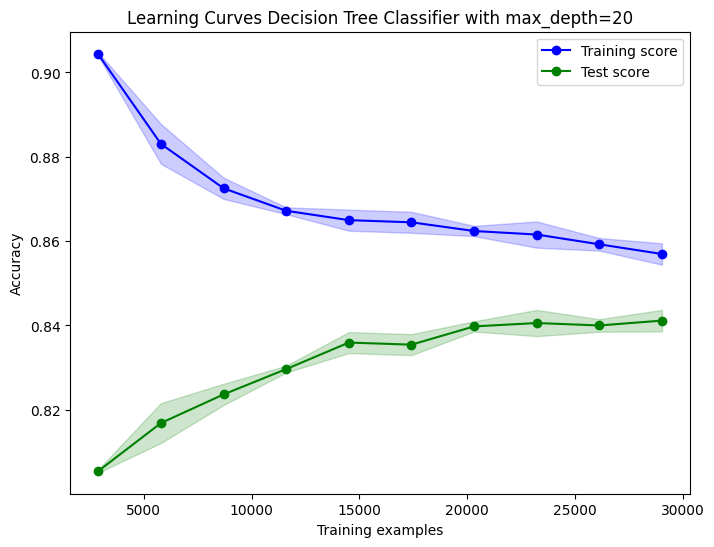

Train size: 2902 Train score: 0.989 Test score: 0.788
Train size: 5804 Train score: 0.987 Test score: 0.801
Train size: 8706 Train score: 0.981 Test score: 0.812
Train size: 11608 Train score: 0.972 Test score: 0.826
Train size: 14510 Train score: 0.971 Test score: 0.828
Train size: 17412 Train score: 0.968 Test score: 0.836
Train size: 20314 Train score: 0.967 Test score: 0.842
Train size: 23216 Train score: 0.967 Test score: 0.84
Train size: 26118 Train score: 0.965 Test score: 0.845
Train size: 29020 Train score: 0.962 Test score: 0.85


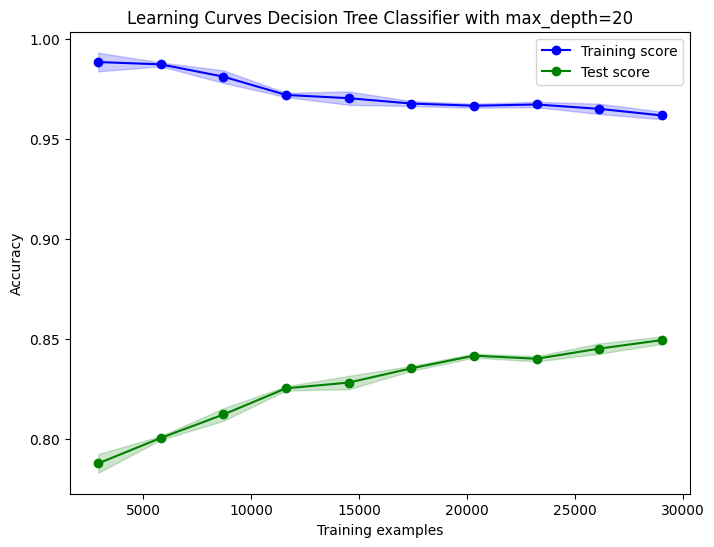

In [22]:
for max_depth in [10,20]:
    tree_d = DecisionTreeClassifier(max_depth=max_depth)
    plot_learning_curves(tree_d, X, y, title='Decision Tree Classifier with max_depth=20')